In [3]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import PIL.Image as Image
import io
from glob import glob
import numpy as np
# import seaborn as sns
# sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import subtle.utils.io as suio

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (12, 8)

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

def byte_to_array(img_bstr):
    return np.array(Image.open(io.BytesIO(img_bstr)))

def get_disp_img(key):
    img_array = []

    img_dim = 240

    imgs = event_acc.Images(key)

    for idx, img in enumerate(imgs):
        img_bstr = img.encoded_image_string
        img_el = img_array.append(byte_to_array(img_bstr))
        
    img_array = np.array(img_array)

    num_parts = img_array.shape[-1] // img_dim
    img_array = np.reshape(img_array, (num_files, img_dim, num_parts, img_dim))
    
    view_idx = [0, 1, 3]
#     view_idx = [4, 6, 7, 8, 9]
#     view_idx = [5, 7]

#     sum_img = np.sum(img_array[:, :, 6:9], axis=2)
#     pre_con = img_array[:, :, 0]
#     sum_img = np.interp(sum_img, (sum_img.min(), sum_img.max()), (pre_con.min(), pre_con.max()))
#     diff_img = sum_img - pre_con
        
    img_disp = img_array[:, :, view_idx, :]
#     img_disp = np.append(img_disp, diff_img[:, :, None, :], axis=2)
    img_disp = np.reshape(img_disp, (img_disp.shape[0], img_disp.shape[1], -1))
    
    return img_disp

log_path = '/home/jiang/projects/SubtleGad/tiantan/unet_2d_low2full/log/acb461_1623970408.9634569_image/'
#log_path = '/home/ubuntu/jiang/SubtleGad/tiantan/series_unet2d_low2full_single/log/8d59a5_1623856673.0039842_image/'
#log_path = '/home/ubuntu/jiang/SubtleGad/tiantan/unet_2d_low2full/log/cef040_1623696455.7413785_image/'
#log_path = '/home/ubuntu/jiang/SubtleGad/tiantan/unet_2d_low2zero/log/7347d0_1623289781.019182_image/'
num_files = len(glob('{}/*'.format(log_path)))

tf_size_guidance = {
    'compressedHistograms': 0,
    'images': num_files,
    'scalars': 0,
    'histograms': 0
}

event_acc = EventAccumulator(log_path, size_guidance=tf_size_guidance)
event_acc.Reload()

<Figure size 864x576 with 0 Axes>

In [10]:
img_keys = event_acc.images.Keys()
print(img_keys)

img_disp = get_disp_img('Brain3H-600437593_63')

@interact
def show_tb_imgs(idx=(0, img_disp.shape[0]-1, 1)):
    plt.imshow(img_disp[idx], vmax=180)
    plt.title('Index {}'.format(idx))
    plt.axis('off')

['Case1_69', 'Case1_96', 'Brain3H-600437593_63', 'Brain3H-600437593_74', 'Brain5H-601047608_102', 'Brain5H-601047608_114', 'NO6_134', 'NO14_82', 'NO14_107', 'NO18_110']


interactive(children=(IntSlider(value=49, description='idx', max=99), Output()), _dom_classes=('widget-interac…

In [11]:
img_disp = get_disp_img('NO18_110')

@interact
def show_tb_imgs(idx=(0, img_disp.shape[0]-1, 1)):
    plt.imshow(img_disp[idx], vmax=180)
    plt.title('Index {}'.format(idx))
    plt.axis('off')

interactive(children=(IntSlider(value=49, description='idx', max=99), Output()), _dom_classes=('widget-interac…

In [12]:
img_disp = get_disp_img('NO6_134')

@interact
def show_tb_imgs(idx=(0, img_disp.shape[0]-1, 1)):
    plt.imshow(img_disp[idx], vmax=180)
    plt.title('Index {}'.format(idx))
    plt.axis('off')

interactive(children=(IntSlider(value=49, description='idx', max=99), Output()), _dom_classes=('widget-interac…

In [11]:
img_disp = get_disp_img('NO9_101')

@interact
def show_tb_imgs(idx=(0, img_disp.shape[0]-1, 1)):
    plt.imshow(img_disp[idx], vmax=180)
    plt.title('Index {}'.format(idx))

interactive(children=(IntSlider(value=49, description='idx', max=99), Output()), _dom_classes=('widget-interac…

In [6]:
img_disp = get_disp_img('NO9_111')

@interact
def show_tb_imgs(idx=(0, img_disp.shape[0]-1, 1)):
    plt.imshow(img_disp[idx], vmax=180)
    plt.title('Index {}'.format(idx))

interactive(children=(IntSlider(value=49, description='idx', max=99), Output()), _dom_classes=('widget-interac…

In [7]:
img_disp = get_disp_img('NO9_91')

@interact
def show_tb_imgs(idx=(0, img_disp.shape[0]-1, 1)):
    plt.imshow(img_disp[idx], vmax=180)
    plt.title('Index {}'.format(idx))

interactive(children=(IntSlider(value=49, description='idx', max=99), Output()), _dom_classes=('widget-interac…

In [ ]:
### Fboost models - combined

### Fboost super model (7 + 1 = 8 channels final encoder input)

# Case1 - 10, 43, 46, 56, 
# NO6
# NO14

# NO39
# NO44
# NO57
# NO65

In [17]:
### Fboost Models - Indiv

### T1 + UAD

# Case1 - 4, 8, 9, 12, 14, 20, 22, 25, 27, 29, 30, 35, 37, 41, 46, 58, 60, 62, 67, 70, 73, 80, 85, 90, 99
# NO6 - 4, 20, 29, 67, 90
# NO14 - 37, 73

# NO39 - 37
# NO44
# NO57 - 4, 12, 14, 20, 22, 25, 29, 62
# NO65 - 

# Overall candidates - 4, 20, 29

### T1 + FLAIR

# Case1 - 4, 9, 10, 13, 15, 16, 25, 29, 31, 34, 35, 38, 42, 44, 45, 49, 58, 59, 69, 74, 77, 83, 85, 89, 97
# NO6 - 9
# NO14

# NO39 - 4, 15, 16, 29, 35, 42, 44, 45, 49, 58, 59, 69, 89, 97
# NO44 - 
# NO57 - 4, 42, 69, 89, 97
# NO65

# Overall candidates - 4, 89, 97


### T1 + T2

# Case1 - 3, 9, 12, 23, 28, 31, 38, 42, 51, 56, 88, 99
# NO6 - 3, 7, 9, 15, 21, 23, 28, 31, 38, 42, 51, 56, 62, 87, 88, 99
# NO14 - 9, 15, 21, 23, 31, 38, 51, 56, 62, 88

# NO39 - 9, 31, 38, 56, 87
# NO44 - 9, 21, 51, 56, 87
# NO57 - 9, 31, 56, 62, 88, 99
# NO65 - 

# Overall candidates - 9, 31, 38, 56, 88

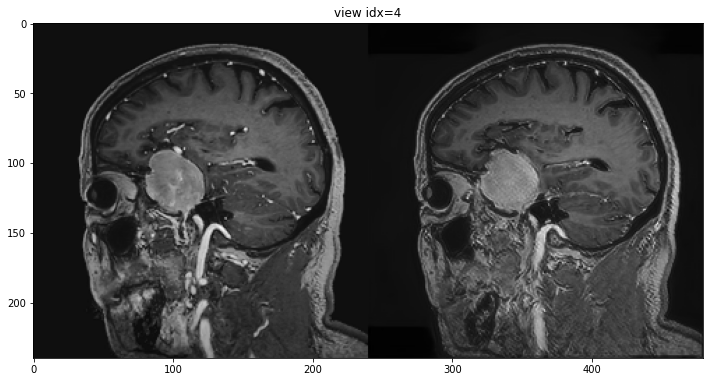

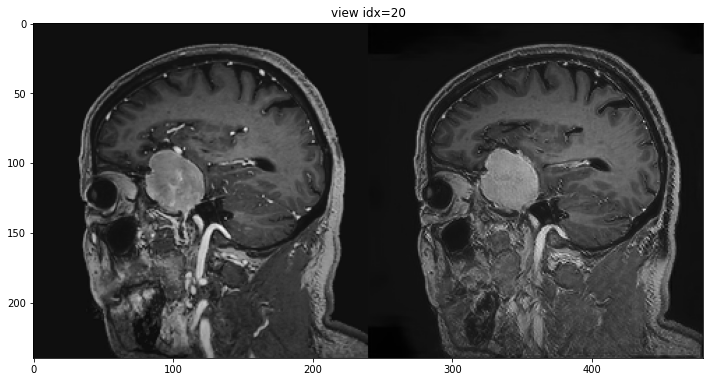

In [22]:
view_idxs = [4, 20]

# img_view = np.vstack(img_disp[view_idxs])
# plt.imshow(img_view)

### no_10pct

# Case1
# NO6
# NO14

# NO39
# NO44
# NO57
# NO65


for view_idx in view_idxs:
    plt.imshow(img_disp[view_idx])
    plt.title('view idx={}'.format(view_idx))
    plt.show()

In [ ]:
### VGG MPR Models

### t2_uadch7_enhuad

# Case1
# NO6
# NO14

# NO39 - 5, 24, 31
# NO44 - 5, 24, 31
# NO57 - 5, 10, 31
# NO65 - 24, 31

# Overall candidates - 5, 24, 31

### t2_uadch1_enhuad

# Case1
# NO6
# NO14

# NO39 - 7, 14, 17
# NO44 - 13, 17
# NO57 - 13, 17
# NO65 - 14, 18

# Overall candidates - 14, 17, 18

### fl_uadch7_enhuad

# Case1
# NO6
# NO14

# NO39 - 1, 29
# NO44 - 6
# NO57 - 1, 30
# NO65 - 29, 30

# Overall candidates - 1, 29, 30

In [ ]:
# T2 Models

### L1 + SSIM
# Case1 - 0, 23, 73
# NO6 - 23, 27, 30, 73
# NO14 - 23, 30, 73, 75

# NO39 - 5, 41, 55
# NO44 - 13, 18, 22, 30, 40, 55, 61
# NO57 - 13, 22, 30, 55, 61, 79

# Overall candidates - 13, 22, 30, 40, 41, 55, 61

### T2 Reg Enh with UAD input
# Case1 - 7, 11, 58
# NO6 - 7, 12, 17, 25
# NO14 - 11, 14, 20, 61

# NO39 - 7, 11, 14
# NO44 - 7, 14
# NO57 - 11, 13, 14
# NO65 - 7, 11, 14

# Overall candidates - 7, 11, 14

### T2 Enh UAD with UAD input
# Case1 - 12, 14, 22, 28, 34, 61, 66, 83
# NO6 - 22, 29, 34, 41, 61
# NO14 - 14, 23, 66

# NO39 - 14, 23, 28, 41
# NO44 - 14, 28, 34, 41
# NO57 - 14, 28, 41
# NO65 - 14, 23, 28, 41

# Overall candidates - 14, 28, 41

In [ ]:
### FLAIR models

### FLAIR input L1 + SSIM

# Case1 - 8, 11, 20, 23, 40, 90
# NO6 - 23, 30, 32, 38, 47, 60, 73, 90
# NO14 - 20, 23, 38, 90

# NO39 - 23, 90
# NO44 - 23, 38
# NO57 - 38, 90
# NO65 - 23

### uadenh_basic

# Case1 - 7, 10
# NO6 - 7, 10, 29, 36
# NO14 - 7, 10, 29, 36, 54, 80

# NO39 - 29
# NO44 - 29
# NO57 - 7, 36
# NO65 - 7, 12, 29, 36

### enh_basic

# Case1
# NO6
# NO14

# NO39 - 7, 10, 15
# NO44
# NO57 - 14, 20, 42, 52, 58
# NO65

### uadip_basic

# Case1
# NO6
# NO14

# NO39 - 64, 80, 83, 91
# NO44
# NO57 - 83, 91
# NO65


### uadip_uadenh

# Case1
# NO6
# NO14

# NO39 - 9, 27, 28, 37, 54
# NO44 - 54
# NO57 - 7, 54, 67
# NO65 - 37, 54

# Overall candidates - 9, 37, 54

In [58]:
data = suio.load_file('/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl/NO14.h5')
uad = np.load('/home/srivathsa/projects/studies/gad/tiantan/preprocess/uad_masks_fl/NO14.npy')
sl = 82

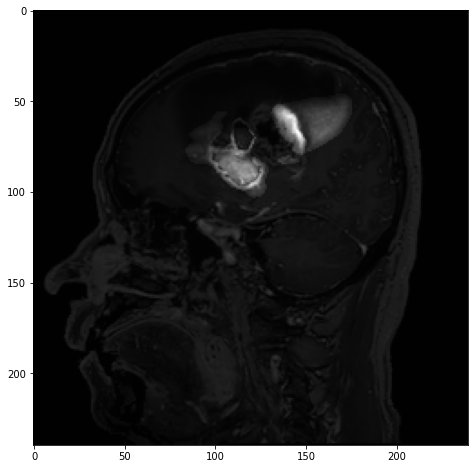

In [59]:
plt.imshow(data[sl, 2] * uad[sl] + data[sl, 2] * 0.1)

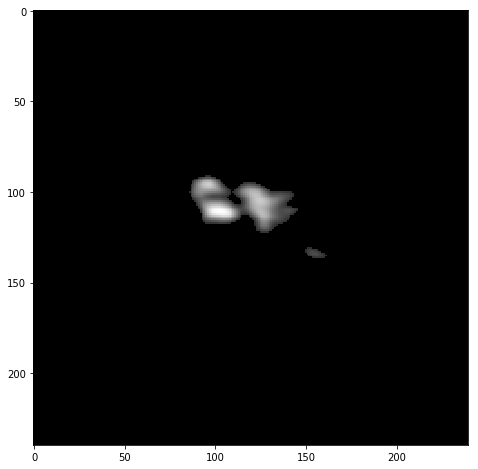

In [13]:
plt.imshow(uad[69])

(8, 240, 240, 28)
(8, 240, 240, 2)


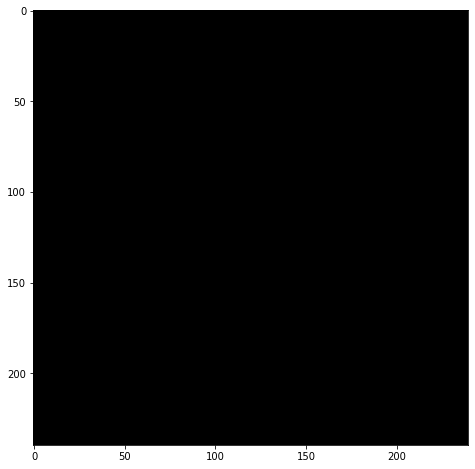

In [40]:
data = np.load('/home/srivathsa/projects/studies/gad/tiantan/inference/debug/X_88.npy')
Y = np.load('/home/srivathsa/projects/studies/gad/tiantan/inference/debug/Y_88.npy')
print(data.shape)
print(Y.shape)
plt.imshow(Y[0, ..., 1])